In [30]:
import pickle
import numpy as np

In [31]:
with open("train_qa.txt", "rb") as fp:   
    train_data =  pickle.load(fp)

In [32]:
with open("test_qa.txt", "rb") as fp:   
    test_data =  pickle.load(fp)

In [33]:
type(test_data)

list

In [34]:
type(train_data)

list

In [35]:
len(test_data)

1000

In [36]:
len(train_data)

10000

In [37]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [38]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [39]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [40]:
train_data[0][2]

'no'

In [41]:
# Create a set that holds the vocab words
vocab = set()

In [42]:
all_data = test_data + train_data

In [43]:
for story, question , answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [44]:
vocab.add('no')
vocab.add('yes')

In [45]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [46]:
vocab_len = len(vocab) + 1 

In [47]:
max_story_len = max([len(data[0]) for data in all_data])

In [48]:
max_story_len

156

In [49]:
max_question_len = max([len(data[1]) for data in all_data])

In [50]:
max_question_len

6

In [51]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [52]:

vocab_size = len(vocab) + 1

In [53]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [54]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [55]:
tokenizer.word_index

{'to': 1,
 'sandra': 2,
 'kitchen': 3,
 'put': 4,
 'football': 5,
 'daniel': 6,
 'mary': 7,
 'milk': 8,
 'the': 9,
 'yes': 10,
 'went': 11,
 'in': 12,
 'took': 13,
 'garden': 14,
 'bedroom': 15,
 'picked': 16,
 'moved': 17,
 'got': 18,
 'bathroom': 19,
 'journeyed': 20,
 'there': 21,
 'travelled': 22,
 'up': 23,
 '?': 24,
 'no': 25,
 'down': 26,
 'dropped': 27,
 'grabbed': 28,
 'back': 29,
 '.': 30,
 'office': 31,
 'is': 32,
 'apple': 33,
 'john': 34,
 'left': 35,
 'hallway': 36,
 'discarded': 37}

In [56]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [57]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [58]:
len(train_story_text)

10000

In [59]:
len(train_story_seq)

10000

In [60]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):

    

    X = []

    Xq = []

    Y = []
    
    
    for story, query, answer in data:
        

        x = [word_index[word.lower()] for word in story]

        xq = [word_index[word.lower()] for word in query]
        
        y = np.zeros(len(word_index) + 1)
        
        
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        

    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [61]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [62]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [63]:
inputs_test

array([[ 0,  0,  0, ...,  9, 15, 30],
       [ 0,  0,  0, ...,  9, 14, 30],
       [ 0,  0,  0, ...,  9, 14, 30],
       ...,
       [ 0,  0,  0, ...,  9, 33, 30],
       [ 0,  0,  0, ...,  9, 14, 30],
       [ 0,  0,  0, ..., 33, 21, 30]])

In [64]:
queries_test

array([[32, 34, 12,  9,  3, 24],
       [32, 34, 12,  9,  3, 24],
       [32, 34, 12,  9, 14, 24],
       ...,
       [32,  7, 12,  9, 15, 24],
       [32,  2, 12,  9, 14, 24],
       [32,  7, 12,  9, 14, 24]])

In [65]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 497.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [67]:
tokenizer.word_index['yes']

10

In [68]:
tokenizer.word_index['no']

25

In [69]:
from keras.models import Sequential, Model
from keras.layers import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

In [70]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [71]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))


In [72]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))


In [73]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [74]:

input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [75]:

match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [76]:
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

In [77]:
answer = concatenate([response, question_encoded])

In [78]:
answer

<KerasTensor shape=(None, 6, 220), dtype=float32, sparse=False, name=keras_tensor_18>

In [79]:
answer = LSTM(32)(answer) 

In [80]:

answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [81]:

answer = Activation('softmax')(answer)


model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [82]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 156)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 156, 64)   │      2,432 │ input_layer[0][0] │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_2        │ (None, 6, 64)     │      2,432 │ input_layer_1[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 156, 6)    │          0 │ sequential[0][0], │
│                     │                   │            │ sequential_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 156, 6)    │          0 │ dot[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_1        │ (None, 156, 6)    │        228 │ input_layer[0][0] │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 156, 6)    │          0 │ activation[0][0], │
│                     │                   │            │ sequential_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute (Permute)   │ (None, 6, 156)    │          0 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 6, 220)    │          0 │ permute[0][0],    │
│ (Concatenate)       │                   │            │ sequential_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 32)        │     32,384 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32)        │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 38)        │      1,254 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 38)        │          0 │ dense[0][0]       │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,730 (151.29 KB)

 Trainable params: 38,730 (151.29 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:

history = model.fit([inputs_train, queries_train], answers_train,batch_size=16,
                    epochs=64,validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/64
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4850 - loss: 1.0388 - val_accuracy: 0.5030 - val_loss: 0.6934
Epoch 2/64
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5010 - loss: 0.7006 - val_accuracy: 0.4970 - val_loss: 0.6943
Epoch 3/64
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4921 - loss: 0.6965 - val_accuracy: 0.5030 - val_loss: 0.6954
Epoch 4/64
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4901 - loss: 0.6965 - val_accuracy: 0.4970 - val_loss: 0.6934
Epoch 5/64
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4989 - loss: 0.6960 - val_accuracy: 0.5030 - val_loss: 0.6950
Epoch 6/64
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5092 - loss: 0.6952 - val_accuracy: 0.4970 - val_loss: 0.6940
Epoch 7/64
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5114 - loss: 0.6944 - val_accuracy: 0.4970 - val_loss: 0.6934
Epoch 8/64
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4962 - loss: 0.6963 - val_accuracy: 0.

In [84]:
filename = 'chatbot_120_epochs.h5'
model.save(filename)

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


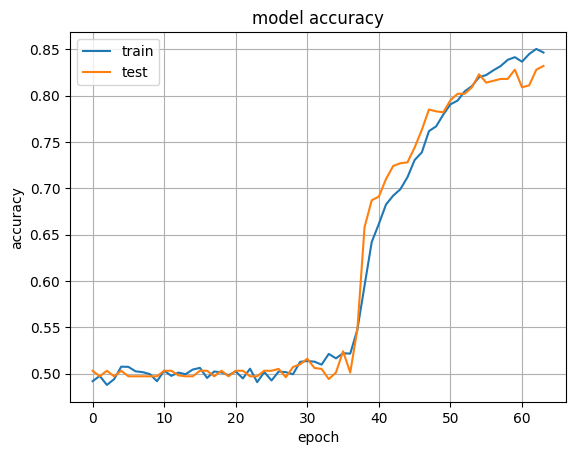

In [86]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

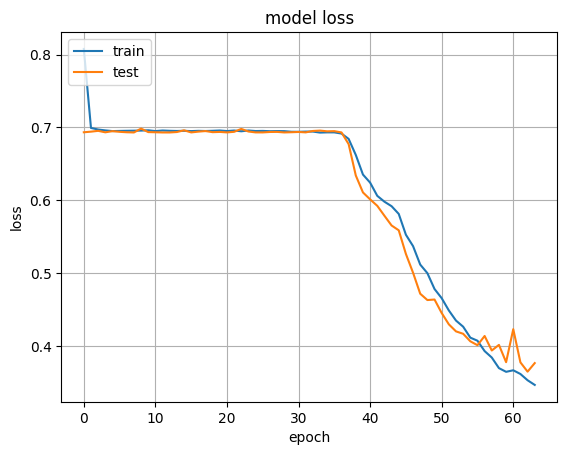

In [87]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [88]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [89]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [90]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [91]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [92]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [93]:

val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.6684904


In [94]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [95]:

my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [96]:
my_question = "Is the football in the kitchen ?"

In [97]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
splitted_my_story=my_story.split()

In [98]:
mydata = [(splitted_my_story,my_question.split(),'yes')]

In [99]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [100]:
pred_results = model.predict(([ my_story, my_ques]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [101]:

val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.99749064
